# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [ ]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Напишите Ваш код для решения задачи


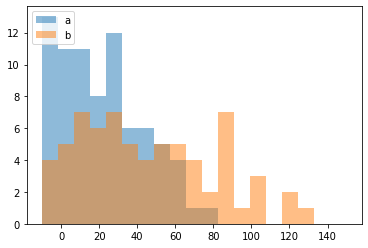

In [ ]:
bins = np.linspace(-10, 150, 20)

plt.hist(A, bins, alpha = 0.5, label='a')
plt.hist(B, bins, alpha = 0.5, label='b')
plt.legend(loc='upper left')


In [ ]:
stat,p = stats.kruskal(A,B)

print(f'Статистика = {stat:.3f}, p={p:.3f}')
if p > 0.05:
  print('Не отклоняем Н0: распределение, вероятно , одинаковое')
else:
  print("отклоняем Н0: распределение, вероятно, не одинаковое")

Статистика = 2.577, p=0.108
Не отклоняем Н0: распределение, вероятно , одинаковое


Данные распределенны  нормально.\
По графику видно что припарат B оказывает большее влияние на поциентов нежели припарат А

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [ ]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral = [2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Напишите Ваш код для решения задачи
a = {'water': water,
     'nutri': nutri,
     'mineral':mineral}
df = pd.DataFrame.from_dict(a,orient='index').T
df[:5]

,water,nutri,mineral
0,1.0,1.0,2.0
1,2.0,2.0,1.0
2,3.0,4.0,1.0
3,4.0,6.0,3.0
4,2.0,5.0,2.0


In [ ]:
df_melt = pd.melt(df.reset_index(),
                  id_vars=['index'],
                  value_vars=['water','nutri','mineral'])
df_melt.columns = ['index','watering','value']
df_melt[:10]

,index,watering,value
0,0,water,1.0
1,1,water,2.0
2,2,water,3.0
3,3,water,4.0
4,4,water,2.0
5,5,water,4.0
6,6,water,2.0
7,7,water,4.0
8,8,water,5.0
9,9,water,2.0


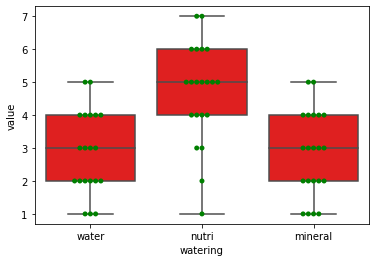

In [ ]:
ax = sns.boxplot(x='watering',
                 y='value',
                 data=df_melt, 
                 color='red') 
ax = sns.swarmplot(x='watering',
                   y='value', 
                   data=df_melt, 
                   color='g')

plt.show()

По выше показанным боксплотам,можно сказать что отличий между водой и минералкой нет, очень хорошо сказывается на урожайность огурцов полив водой с добавлением удобрений

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [ ]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

<ipython-input-117-e392f90565af>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [ ]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


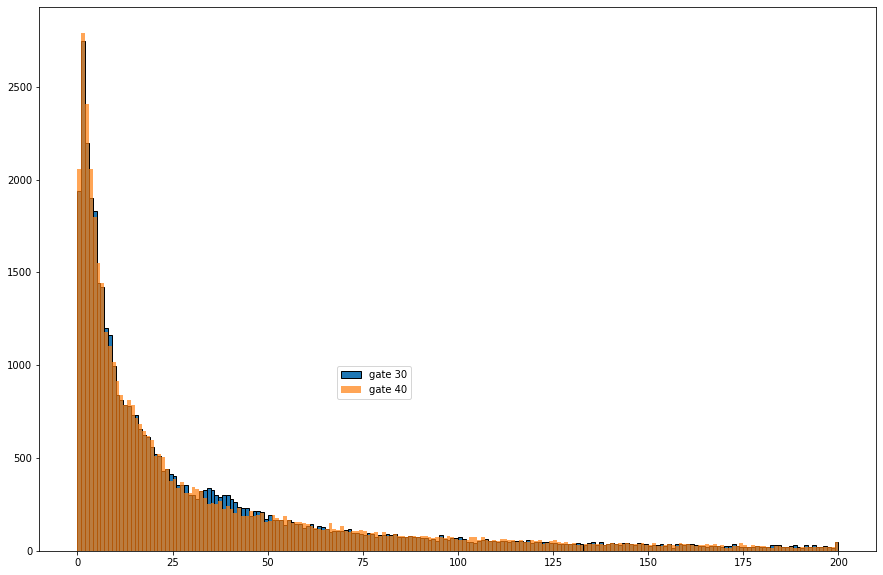

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

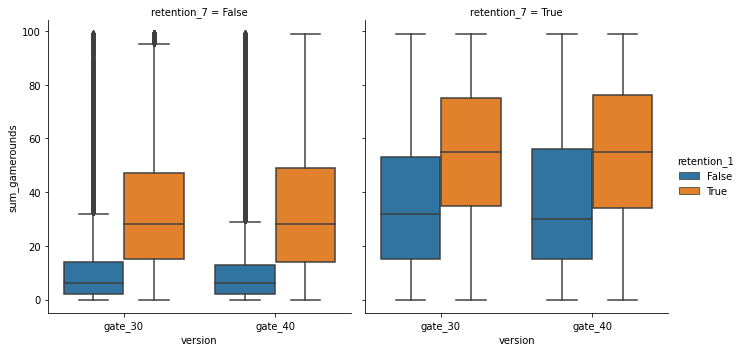

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

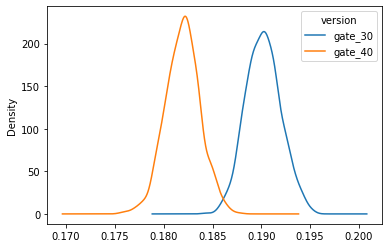

In [ ]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

In [ ]:
from scipy.stats import f_oneway 
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p

(0.7939569526814368, 0.3729086824696095)

In [ ]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Напишите Ваш код для решения задачи

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Не отклоняем Н0: распределение , вероятно, одинаокво')
else:
  print('Отклоняем Н0: распределение. вероятно, различается')

Statistics=1024331250.500, p=0.050
Не отклоняем Н0: распределение , вероятно, одинаокво


In [ ]:
stat,p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f,p=%.10f' % (stat,p))
if p > 0.05:
  print('Не отклоняем Н0: средние,вероятно ,одинаковы')
else:
  print('Отклоняем Н0: средние , вероятно,различаются')

Статистика=97.187,p=0.0000000000
Отклоняем Н0: средние , вероятно,различаются


###**Вывод**:

По графикам заметна небольшая разница между установкой ворот на 30м и 40м уровнях, в пользу 40го уровня.\
Также тест Манно-Уитни показал что значения близки к статистически значемому, но не до конца.\
Для полной уверенности мы Bootstrap, чтобы полностью убедиться в различии.\
Результат показывает что p-value очень близко к машинному нулю, это гооврит нам о том, что статистические различия между ыборками присутствуют!


###**Блок 3**
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [ ]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-2-1e6d6fedfab1>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
#делим датасет на две выборки по классам
grass = pokemon.loc[(pokemon['Class 1']=='Grass') | (pokemon['Class 2'] == 'Grass') & (pokemon['Class 2'] != 'Rock')]
rock = pokemon.loc[(pokemon['Class 1']=='Rock') | (pokemon['Class 2'] == 'Rock') & (pokemon['Class 2'] != 'Grass')]

In [ ]:
grass = grass[:len(rock)]

In [ ]:
len(grass) == len(rock)

True

In [ ]:
grass[:5]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False


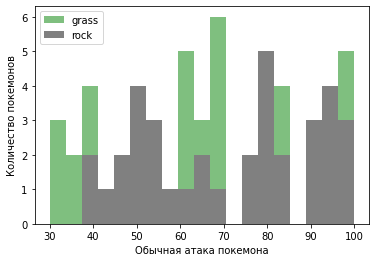

In [ ]:
bins = np.linspace(30, 100, 20)
##рисуем боксплот по аттакам классов
plt.hist(grass.Attack, bins, alpha = 0.5, label='grass',color='green')
plt.hist(rock.Attack, bins, alpha = 1, label='rock',color='grey')

plt.legend(loc='upper left')
plt.xlabel('Обычная атака покемона')
plt.ylabel('Количество покемонов')

plt.show()

In [ ]:
stat,p = stats.kruskal(grass.Attack,rock.Attack)
##считаем статистику распределения данных 
print(f'Статистика = {stat:.3f}, p={p:.3f}')
if p > 0.05:
  print('Не отклоняем Н0: распределение, вероятно , одинаковое')
else:
  print("отклоняем Н0: распределение, вероятно, не одинаковое")

Статистика = 8.476, p=0.004
отклоняем Н0: распределение, вероятно, не одинаковое


In [ ]:
np.mean(grass.Attack),np.mean(rock.Attack)

(72.27586206896552, 90.72413793103448)

In [ ]:
stats.mode(grass.Attack)[0],stats.mode(rock.Attack)[0]

<ipython-input-15-88f361917d85>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(grass.Attack)[0],stats.mode(rock.Attack)[0]


(array([100]), array([95]))

###**Вывод:**
Профессор Оук был прав , атаки классов и правда отличаются но в пользу покемонов класса "Rock" нежели покемонов класса "Grass"

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
water = pokemon.loc[(pokemon['Class 1']=='Water') | (pokemon['Class 2'] == 'Water') & (pokemon['Class 2'] != 'Normal')]
normal= pokemon.loc[(pokemon['Class 1']=='Normal') | (pokemon['Class 2'] == 'Normal') & (pokemon['Class 2'] != 'Water')]
water = water.rename(columns={'Speed':'wat_speed'})
normal = normal.rename(columns={'Speed':'norm_speed'})
water[:6]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,wat_speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,False
60,61,Golduck,Water,NaN,80,82,78,95,80,85,False


In [ ]:
water_speed = water['wat_speed'].reset_index(drop=True)
normal_speed = normal['norm_speed'].reset_index(drop=True)

In [ ]:
merge = pd.concat([water_speed,normal_speed],
                  axis=1)
merge[:5]

,wat_speed,norm_speed
0,43,56.0
1,58,71.0
2,78,101.0
3,78,121.0
4,55,72.0


In [ ]:
df_melt = pd.melt(merge.reset_index(),
                  id_vars=['index'],
                  value_vars=['wat_speed','norm_speed'])
df_melt.columns = ['index','type','value']
df_melt[:10]

,index,type,value
0,0,wat_speed,43.0
1,1,wat_speed,58.0
2,2,wat_speed,78.0
3,3,wat_speed,78.0
4,4,wat_speed,55.0
5,5,wat_speed,85.0
6,6,wat_speed,90.0
7,7,wat_speed,90.0
8,8,wat_speed,70.0
9,9,wat_speed,70.0


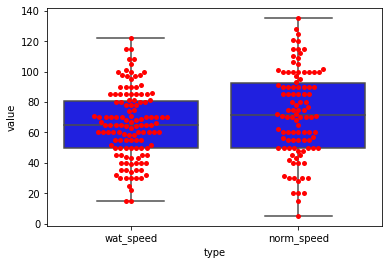

In [ ]:
ax = sns.boxplot(x='type',
                 y='value',
                 data=df_melt, 
                 color='blue') 
ax = sns.swarmplot(x='type',
                   y='value', 
                   data=df_melt, 
                   color='red')

plt.show()

In [ ]:
mean_wat = np.mean(merge.wat_speed)
mean_norm = np.mean(merge.norm_speed)
if  mean_wat > mean_norm:
  print(f"Покемоны класса water в среднем быстрее покемонов класса Normal на:{mean_wat - mean_norm}")
elif mean_wat > mean_norm:
  print(f"fПокемоны класса Normal в среднем быстрее покемонов класса Water на:{mean_norm - mean_wat}")
else:
  print("В среднем скорость покемонов между классами равна!")


В среднем скорость покемонов между классами равна!


**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [ ]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
pokemon[:5]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
new_pok = pokemon[['Name','Speed']]
new_pok[:5]

,Name,Speed
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,Mega Venusaur,80
4,Charmander,65


In [ ]:
treathed = new_pok[new_pok.Name.isin(['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny'])]

treathed = treathed.reset_index(drop=True)
treathed

,Name,Speed
0,Mega Beedrill,145
1,Mega Alakazam,150
2,Deoxys Normal Forme,150
3,Mega Lopunny,135


In [ ]:
pok = new_pok[~new_pok.Name.isin(['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny'])]

In [ ]:
pok = pok[:100:5]
pok.count()

Name     20
Speed    20
dtype: int64

In [ ]:
res_1 = pok.drop('Name',axis=1)
res_2 = treathed.drop('Name',axis=1)


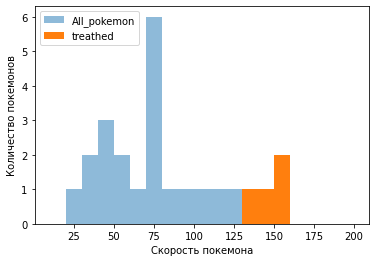

In [ ]:
bins = np.linspace(10, 200, 20)
##рисуем боксплот по аттакам классов
plt.hist(res_1, bins, alpha = 0.5, label='All_pokemon')
plt.hist(res_2, bins, alpha = 1, label='treathed')

plt.legend(loc='upper left')
plt.xlabel('Скорость покемона')
plt.ylabel('Количество покемонов')

plt.show()

In [ ]:
f,p = stats.f_oneway(res_1,res_2)
print('Статистика=%.3f,p=%.6f'%(f,p))

if p > 0.05:
  print('Не отклоняем Н0:средние,вероятно,одинаковы')
else:
  print('Отклоняем Н0:средние,вероятно,различаются')

Статистика=29.003,p=0.000000
Отклоняем Н0:средние,вероятно,различаются


##**Вывод:**
Пусть на графике  видно, но скорость покоменов, употребивших сыворотку,больше ,чем у большинства покемонов!

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
pokemon[:5]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
legend_ = pokemon[pokemon.Legendary == True]

In [ ]:
sum_leg = pd.DataFrame(legend_['HP'] + legend_['Attack'] + legend_['Defense'],
                       columns=['sum_'])
sum_leg = sum_leg.reset_index(drop=True)
sum_leg.count()

sum_    65
dtype: int64

In [ ]:
simple_pokemon = pokemon[pokemon.Legendary == False]
simple_pokemon[:5]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
sum_norm = pd.DataFrame(simple_pokemon['HP'] + simple_pokemon['Attack'] + simple_pokemon['Defense'],
                        columns=['sum'])
sum_norm = sum_norm.reset_index(drop=True)[:165]
sum_norm.count()

sum    165
dtype: int64

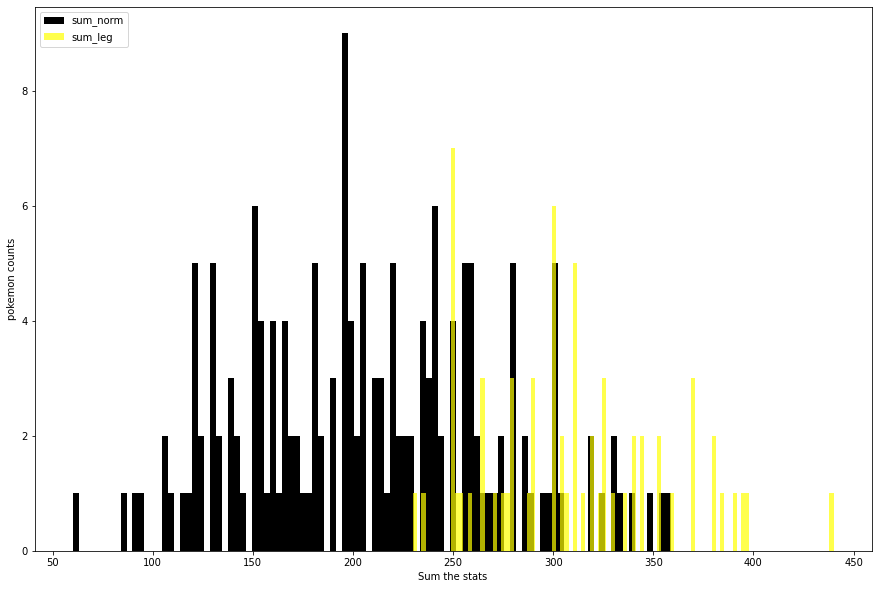

In [ ]:
bins = 100
plt.figure(figsize=(15, 10))
plt.hist(sum_norm['sum'], bins=bins, alpha=1, color='black', label='sum_norm')
plt.hist(sum_leg['sum_'], bins=bins, alpha=0.7,color='yellow', label='sum_leg')
plt.legend(loc='upper left', bbox_to_anchor=(0.45, 0.35))

plt.legend(loc='upper left')
plt.xlabel('Sum the stats')
plt.ylabel('pokemon counts')

plt.show()

In [ ]:
stat,p = stats.kruskal(sum_norm,sum_leg)
print('Статистика=%.3f,p=%.6f'%(stat,p))

if p > 0.05:
  print('Не отклоняем Н0:средние,вероятно,одинаковы')
else:
  print('Отклоняем Н0:средние,вероятно,различаются')

###**Вывод:**
Исходя из графика сравнений суммы показателей можно отчетливо заметить ,что легендарные покемоны обладют б**о**льшими значениями характеристик!
Также это подтверждают статистические тексты!!!

In [ ]:
mult_leg = pd.DataFrame(legend_['HP'] * legend_['Attack'] * legend_['Defense'],
                       columns=['mult_'])
mult_leg = mult_leg.reset_index(drop=True)


mult_norm = pd.DataFrame(simple_pokemon['HP'] * simple_pokemon['Attack'] * simple_pokemon['Defense'],
                        columns=['mult'])
mult_norm = mult_norm.reset_index(drop=True)[:165]

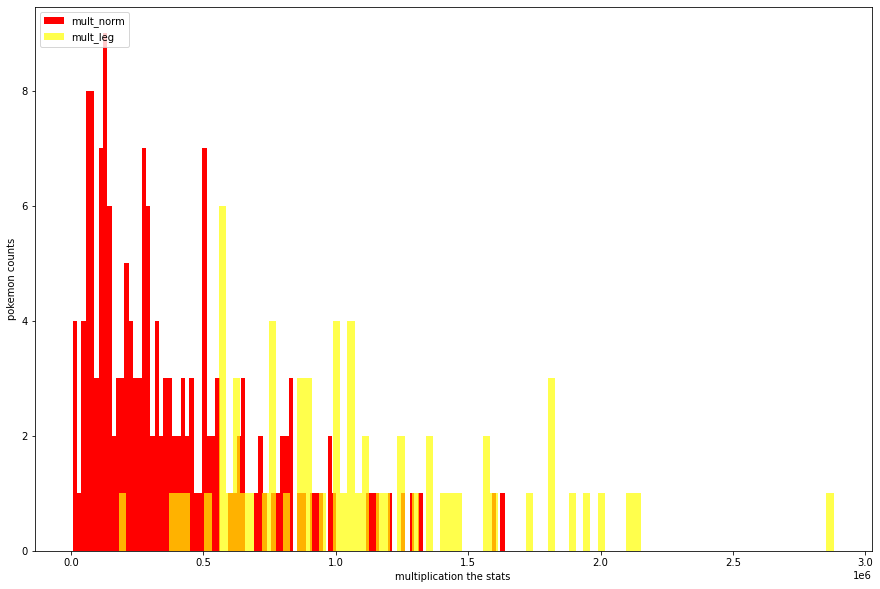

In [ ]:
bins = 100
plt.figure(figsize=(15, 10))
plt.hist(mult_norm['mult'], bins=bins, alpha=1, color='red', label='mult_norm')
plt.hist(mult_leg['mult_'], bins=bins, alpha=0.7,color='yellow', label='mult_leg')
plt.legend(loc='upper left', bbox_to_anchor=(0.45, 0.35))

plt.legend(loc='upper left')
plt.xlabel('multiplication the stats')
plt.ylabel('pokemon counts')

plt.show()

In [ ]:
stat,p = stats.kruskal(mult_norm,mult_leg)
##считаем статистику распределения данных 
print('Статистика=%.3f,p=%.6f'%(stat,p))
if p > 0.05:
  print('Не отклоняем Н0: распределение, вероятно , одинаковое')
else:
  print("отклоняем Н0: распределение, вероятно, не одинаковое")

Статистика=85.119,p=0.000000
отклоняем Н0: распределение, вероятно, не одинаковое


###**Вфвод:**
По итогу при произведении показателее ,\
характеристики легендарных покемонов выше характеристик большинства покемонов!

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [ ]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:

def_ = pokemon[pokemon['Class 1'].isin(best_defence_class)]
def_[:5]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False
56,57,Dugtrio,Ground,NaN,35,80,50,50,70,120,False
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False


<ipython-input-34-4a58a9d58d49>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(def_['Class 1'],


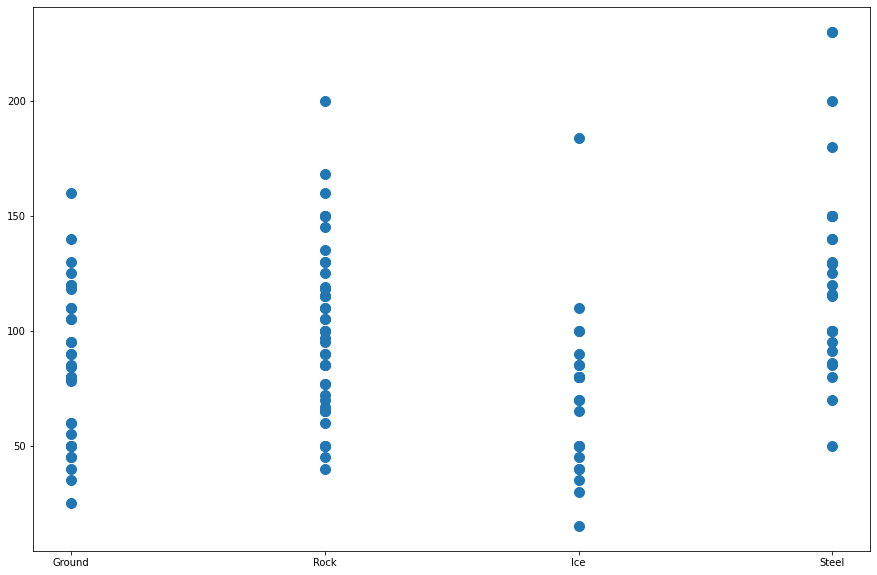

In [ ]:
plt.figure(figsize=(15, 10))
bins=20

plt.scatter(def_['Class 1'],
            def_['Defense'],
            cmap='autumn',
            s=100)

In [ ]:
pok_mean = def_[['Class 1','Defense']]
pok_mean = pok_mean.groupby('Class 1').mean().reset_index()
pok_mean[:10]

,Class 1,Defense
0,Ground,84.843750
1,Ice,71.416667
2,Rock,100.795455
3,Steel,126.370370


<ipython-input-42-83c593c9bc80>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pok_mean['Class 1'],


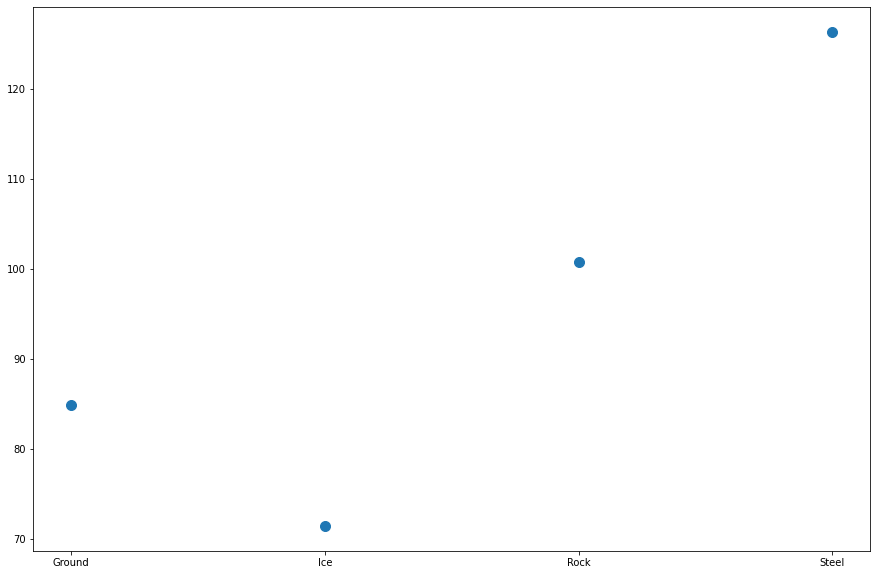

In [ ]:
plt.figure(figsize=(15, 10))
bins=20

plt.scatter(pok_mean['Class 1'],
            pok_mean['Defense'],
            cmap='autumn',
            s=100)


In [ ]:
def_1 = def_[def_['Class 1'] =='Rock']
def_2 = def_[def_['Class 1'] == 'Ground']
def_3 = def_[def_['Class 1'] == 'Steel']
def_4 = def_[def_['Class 1'] == 'Ice']


In [ ]:
stat,p = stats.f_oneway(def_1.Defense,
                        def_2.Defense,
                        def_3.Defense,
                        def_4.Defense)
print('Статистика=%.3f,p=%.10f' % (stat,p))
if p > 0.05:
  print('Не отклоняем Н0: средние,вероятно ,одинаковы')
else:
  print('Отклоняем Н0: средние , вероятно,различаются')

Статистика=10.577,p=0.0000030803
Отклоняем Н0: средние , вероятно,различаются


###**Вывод:**
Професор Оук бы не прав показатель "Защиты" у покемонов классов `best_defence_class`  отличаются между собой. 